<a href="https://colab.research.google.com/github/doanthanhnam1/DoanThanhNam/blob/main/nhan_dien_do_an.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
from os import listdir
from numpy import asarray
from numpy import save
from keras import preprocessing
from tensorflow.keras.utils import load_img, img_to_array

In [90]:
data="/content/drive/MyDrive/do_an/do_an/"

In [91]:
print("Bắt đầu xử lý ảnh...")

pixels,labels=list(),list()

for folder in listdir(data):
    if folder!='.DS_Store':
        #print("Folder=",folder)
        for file in listdir(data  + folder):
            if file!='.DS_Store':
                #print("File=", file)
                pixel=load_img(data  + folder +"/" + file,target_size=(200,200))
                pixel=img_to_array(pixel)
                pixels.append(pixel)
                labels.append( folder)

pixels =asarray(pixels)
labels =asarray(labels)#.reshape(-1,1)

Bắt đầu xử lý ảnh...


In [92]:

from sklearn.preprocessing import LabelBinarizer
import pickle
from sklearn.model_selection import train_test_split
encoder = LabelBinarizer()
labels = encoder.fit_transform(labels)
#print(labels)

file = open('pix.data', 'wb')
# dump information to that file
pickle.dump((pixels,labels), file)
# close the file
file.close()

In [93]:
def load_data():
    file = open('pix.data', 'rb')
    # dump information to that file
    (pixels, labels) = pickle.load(file)
    # close the file
    file.close()
    return pixels, labels

#save_data()
X,y = load_data()
#random.shuffle(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

In [94]:
print(X_train.shape)
print(X_test.shape)

(245, 200, 200, 3)
(62, 200, 200, 3)


In [95]:

from keras.models import Sequential
from keras.layers import Dense
from numpy.ma.core import reshape


In [96]:
X_train= X_train.astype('float32')/255
print(y_train.shape)
X_test= X_test.astype('float32')/255

(245, 10)


In [97]:
from keras import models 
from keras.models import Sequential,Model
from keras import Input
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization
from keras.optimizers import Adam
batch_size=100 #lô
epochs=20     #số lần học
classes=10    #phân loại

In [98]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(200,200,3),padding='same'))
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
#so lan tich chap
model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

In [99]:
model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

In [100]:
from keras import optimizers
from keras import losses
model.add(Flatten())
model.add(Dense(1000,activation='linear'))
model.add(Dense(500,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.compile(loss=losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
model.summary()
train=model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                 

In [101]:
model.save("/content/drive/MyDrive/Colab Notebooks/BT/nhan_dien_do_an.h5")

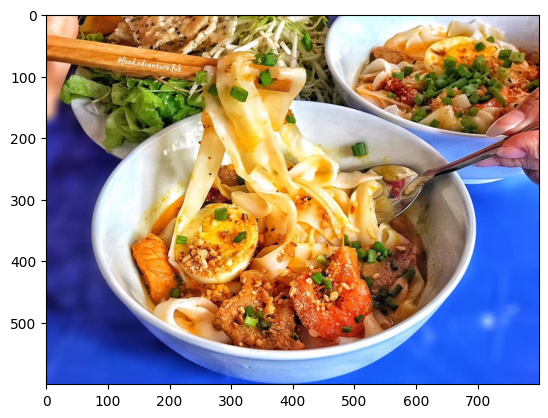

In [102]:
from keras.saving.saving_lib import load_model
import matplotlib.pyplot as plt
from keras.models import load_model
model100=load_model("/content/drive/MyDrive/Colab Notebooks/BT/nhan_dien_do_an.h5")
img=load_img('/content/drive/MyDrive/AI/test2/anh.jpg')
plt.imshow(img)
plt.show()

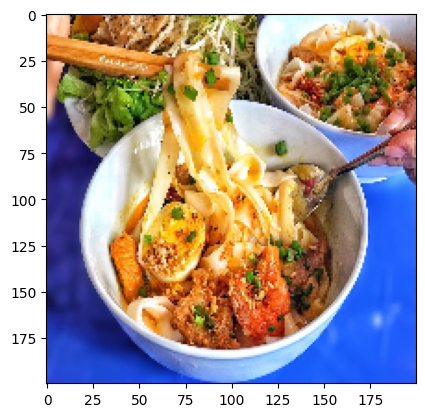

In [103]:
img = load_img('/content/drive/MyDrive/AI/test2/anh.jpg',target_size=(200,200))
plt.imshow(img)

In [104]:
import numpy as np
class_name = ['Bánh Mì','Bánh ướt','Bánh xèo','Bún bò huế','Bún thịt nướng','Chả giò','Cơm tấm','Mì quảng','phở','xôi']
img=img_to_array(img)
img=img.reshape(1,200,200,3)
img=img.astype('float32')
img=img/255
predict = model100.predict(img)
print("This picture is: ", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))

1/1 [==============================] - 1s 772ms/step
This picture is:  Mì quảng [2.0876450e-05 9.4234718e-05 3.2511271e-06 2.3992825e-04 6.2384563e-05
 2.1533010e-04 4.1325742e-04 9.9776626e-01 2.9134052e-04 8.9321507e-04]
0.99776626
